Get statistics about the dataset

In [1]:
import sparqlqueries as sq
import pandas as pd
import matplotlib.pyplot as plt
import paths as p
import json

In [2]:
melart_annotations=json.load(open(p.MELART_ANNOTATIONS_PATH, 'r'))

In [3]:
artworks_qids=dict() # split -> list of qids (keys from the melart annotations)
for qid,melart_artwork in melart_annotations.items():
    split=melart_artwork['split']
    if split not in artworks_qids:
        artworks_qids[split]=[]
    artworks_qids[split].append(qid)
print([f"Split {split}: {len(qids)} artworks" for split,qids in artworks_qids.items()])

['Split test: 100 artworks', 'Split train: 1188 artworks', 'Split val: 328 artworks']


In [4]:
all_qids=[qid for split,qids in artworks_qids.items() for qid in qids]
print(f"Total: {len(all_qids)} artworks")

Total: 1616 artworks


In [24]:
sparql_movements="""
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
SELECT ?ent ?movement  WHERE{ 
VALUES ?ent { %s }
 ?ent wdt:P135 ?movement.
}
""" % " ".join([f"wd:{qid}" for qid in all_qids])
df_movement=sq.sparql_pandas_query(sparql_movements)
df_movement['ent']=df_movement['ent'].apply(lambda x: x.split('/')[-1])
df_movement['movement']=df_movement['movement'].apply(lambda x: x.split('/')[-1])
print(len(df_movement))
df_movement.head()

869


,ent,movement
0,Q1000128,Q189458
1,Q1025704,Q166713
2,Q102852946,Q6076361
3,Q10468599,Q166713
4,Q1065493,Q184814


In [25]:
set_movements=set(df_movement['movement'])
print(f"Total of {len(set_movements)} movements")

Total of 82 movements


Query the labels of the movements

In [26]:
movement_labels=sq.sparql_all_lables(list(set_movements))
for movement in list(set_movements)[:10]:
    print(f"{movement} -> {movement_labels[movement][0]}")

Q37853 -> Baroque
Q1122677 -> Catalan modernism
Q166713 -> post-impressionism
Q131808 -> mannerism
Q3032335 -> Heidelberg School
Q3501307 -> Troubadour style
Q1474884 -> High Renaissance
Q577147 -> Neoclassical painting
Q3272569 -> luminism
Q2477787 -> American Impressionism


Count the number of artworks per movement

<Axes: title={'center': 'Number of artworks per movement'}, xlabel='Movement'>

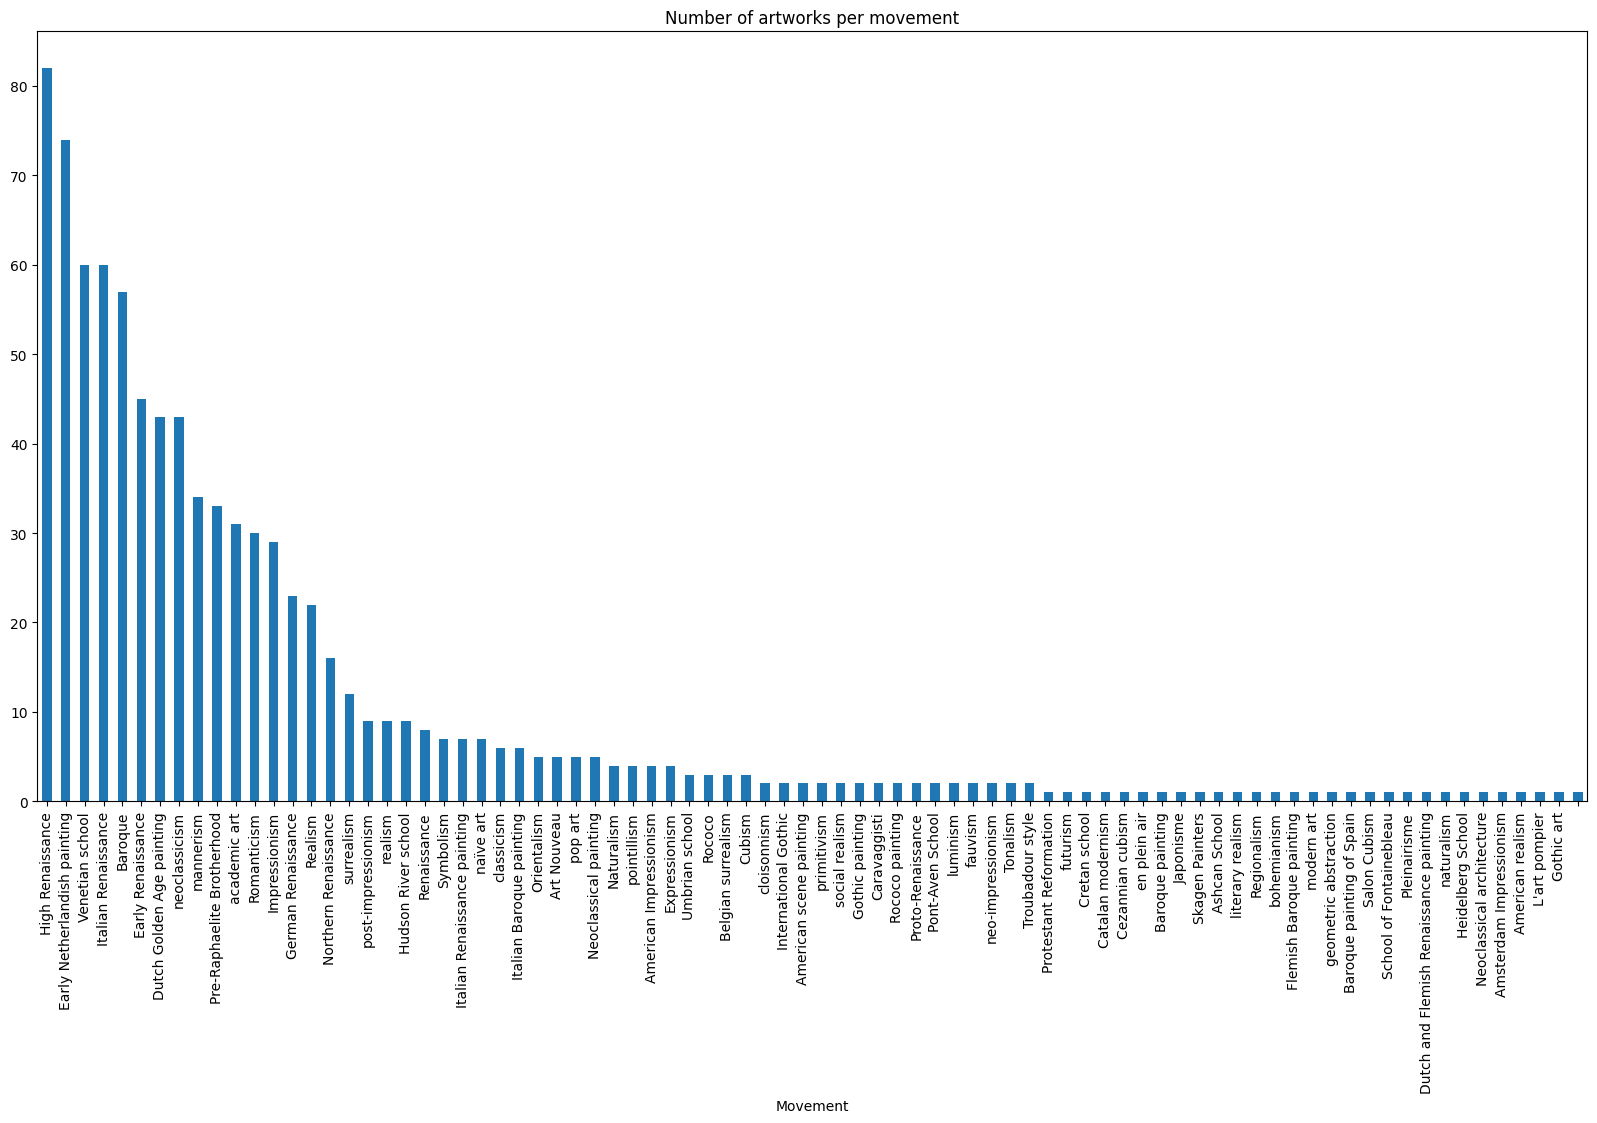

In [27]:
df_movements_count=df_movement.groupby('movement').size().reset_index(name='count')
df_movements_count=df_movements_count.sort_values('count', ascending=False)
df_movements_count["label"]=df_movements_count["movement"].apply(lambda x: movement_labels[x][0])
df_movements_count.plot(kind='bar', x='label', xlabel='Movement' ,y='count', figsize=(20,10), title='Number of artworks per movement', legend=False)

In [30]:
unknown_movement_artworks=set(all_qids)-set(df_movement["ent"])
print(f"Total of {len(unknown_movement_artworks)} artworks without movement")

Total of 861 artworks without movement


In [20]:
sparql_genres="""
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
SELECT ?ent ?genre  WHERE{ 
VALUES ?ent { %s }
 ?ent wdt:P136 ?genre.
}
""" % " ".join([f"wd:{qid}" for qid in all_qids])
df_genre=sq.sparql_pandas_query(sparql_genres)
df_genre['ent']=df_genre['ent'].apply(lambda x: x.split('/')[-1])
df_genre['genre']=df_genre['genre'].apply(lambda x: x.split('/')[-1])
print(len(df_genre))
df_genre.head()

1690


,ent,genre
0,Q1000128,Q1047337
1,Q1016012,Q19547247
2,Q1025704,Q1935974
3,Q102852946,Q2864737
4,Q10322725,Q134307


In [21]:
set_genres=set(df_genre['genre'])
print(f"Total of {len(set_genres)} genres")

Total of 63 genres


In [22]:
genre_labels=sq.sparql_all_lables(list(set_genres))
for genre in list(set_genres)[:10]:
    print(f"{genre} -> {genre_labels[genre][0]}")

Q383898 -> military art
Q3304751 -> meisho-e
Q40415 -> Impressionism
Q1047337 -> genre art
Q128115 -> abstract art
Q11484256 -> yūrei-zu
Q3064465 -> heroic nudity
Q185905 -> ukiyo-e
Q12012994 -> art gallery painting
Q18811686 -> interior view


<Axes: title={'center': 'Number of artworks per genre'}, xlabel='Genre'>

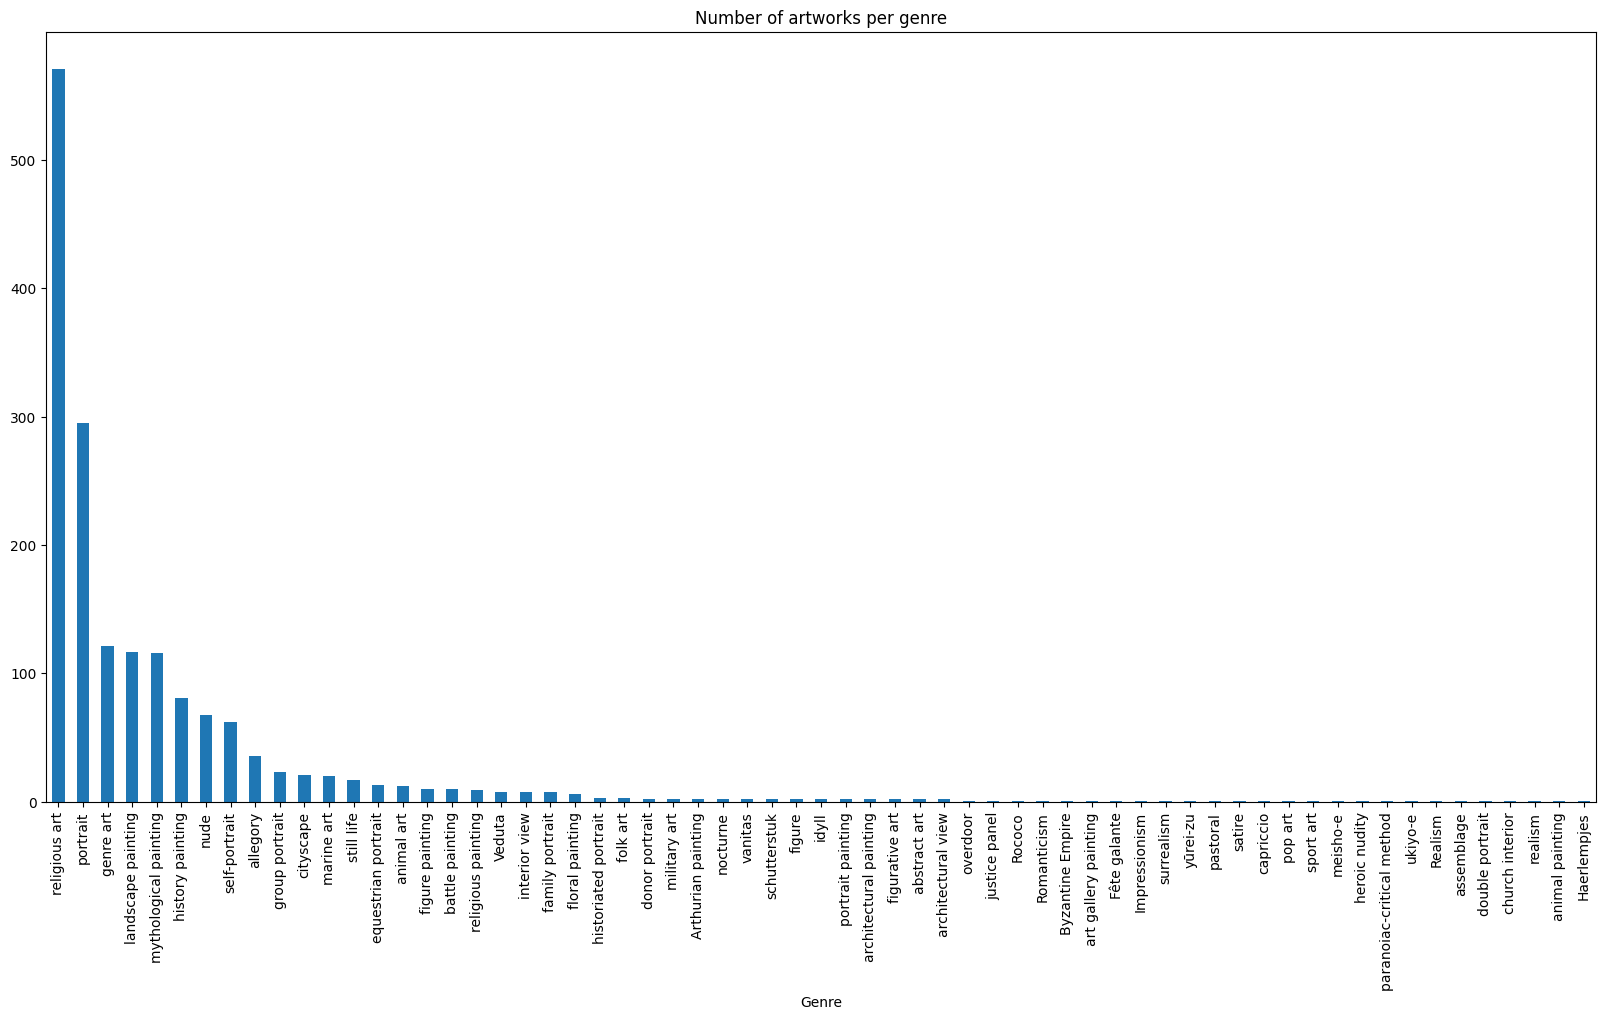

In [23]:
df_genres_count=df_genre.groupby('genre').size().reset_index(name='count')
df_genres_count=df_genres_count.sort_values('count', ascending=False)
df_genres_count["label"]=df_genres_count["genre"].apply(lambda x: genre_labels[x][0])
df_genres_count.plot(kind='bar', x='label', xlabel='Genre' ,y='count', figsize=(20,10), title='Number of artworks per genre', legend=False)

In [31]:
unknown_genre_artworks=set(all_qids)-set(df_genre["ent"])
print(f"Total of {len(unknown_genre_artworks)} artworks without genre")

Total of 129 artworks without genre
